Test sur quelques phrases 

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import pickle
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

df=pd.read_csv('/mnt/c/Users/steph/OneDrive/Images/Rakuten/X_test_update.csv', index_col=0)
df.head(20)

2023-09-20 10:39:09.059899: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-20 10:39:09.061017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 10:39:09.085228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 10:39:09.086232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 10:39:09.534558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

,designation,description,productid,imageid
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690
84921,Cadre Universal Pro Mont Accessoires Pour Dji ...,Cadre Universal Pro Mont Accessoires Pour DJI ...,4181949876,1310030687
84922,5 Biberons Roses En Pâte À Sucre,Lot de 5 biberons de 3cm de haut en pâte à suc...,3317712987,1206034470
84923,Maigrir Rester Jeune N°1 Octobre 1974,NaN,3558757378,1222015991
84924,Grand Canapé 3 Places Chesterfield Blanc,Le véritable canapé Chesterfield 3 places<br /...,4167105045,1306015443
84925,Piscine Beach Wave 229x229x56 cm 57495NP,<p>Cette piscine gonflable Beach Wave 57495NP ...,3929890142,1265209967


test preprocessing

In [2]:
stop_words = stopwords.words('french') + stopwords.words('english') + stopwords.words('german') +[ \
                'plus', 'peut', 'tout', 'etre', 'sans', 'dont', 'aussi',  \
                  'comme', 'meme', 'bien','leurs', 'elles', 'cette','celui',   \
                  'ainsi', 'encore', 'alors', 'toujours', 'toute','deux', 'nouveau',   \
                  'peu', 'car', 'autre', 'jusqu', 'quand', 'ici', 'ceux', 'enfin',  \
                  'jamais', 'autant', 'tant', 'avoir', 'moin', 'celle', 'tous',   \
                  'contre', 'pourtant', 'quelque', 'toutes', 'surtout', 'cet',  \
                  'comment', 'rien', 'avant', 'doit', 'autre', 'depuis', 'moins',  \
                  'tre', 'souvent', 'etait', 'pouvoir', 'apre', 'non', 'ver', 'quel',   \
                  'pourquoi', 'certain', 'fait', 'faire', 'sou', 'donc', 'trop',  \
                  'quelques', 'parfois', 'tres', 'donc', 'dire', 'eacute', 'egrave',  \
                  'rsquo', 'agrave', 'ecirc', 'nbsp', 'acirc', 'apres', 'autres',  \
                  'ocirc', 'entre', 'sous', 'quelle']

In [3]:
import re

def CreateTextANDcleaning(data):
    df = data
    #valeurs MANQUANTES
    df['designation'] = df['designation'].astype('string')
    df['description'] = df['description'].astype('string')

    #create text
    df['text']=""
    for i in range(df.shape[0]):
        df['text'][i] = create_text(df['designation'][i], df['description'][i])

    df['text'] = df['text'].str.split()

    df['text'] = df['text'].apply(lambda x: unique_description(x))
    df['text'] = df['text'].apply(lambda x: " ".join(x))

    df['text'] = df['text'].apply(lambda text : lower_case(text))
    df['text'] = df['text'].apply(lambda text : remove_accent(text))

    df['text'] = df['text'].apply(lambda text : remove_htmltags(text))
    df['text'] = df['text'].apply(lambda text : keeping_essentiel(text))

    # Initialiser la variable des mots vides
    df['text'] = df['text'].str.split()
    df['text']= df['text'].apply(lambda x: operation(x))

    df['text'] = df['text'].apply(lambda x: " ".join(x))

    return df['text']


def create_text(text1, text2):
    if pd.isna(text2):
        text = text1
    else:
        text = text1 +" "+ text2
    return text

def unique_description(text):
    unique=[text[0]]
    for mot in text:
        if mot not in unique:
            unique.append(mot)
    return unique

def lower_case(text):
    text = text.lower().strip()
    return text

def remove_accent(string):
    string = string.replace('á', 'a')
    string = string.replace('â', 'a')

    string = string.replace('é', 'e')
    string = string.replace('è', 'e')
    string = string.replace('ê', 'e')
    string = string.replace('ë', 'e')

    string = string.replace('î', 'i')
    string = string.replace('ï', 'i')

    string = string.replace('ö', 'o')
    string = string.replace('ô', 'o')
    string = string.replace('ò', 'o')
    string = string.replace('ó', 'o')

    string = string.replace('ù', 'u')
    string = string.replace('û', 'u')
    string = string.replace('ü', 'u')

    string = string.replace('ç', 'c')

    return string

def remove_htmltags(text):
    text = re.sub('<[^<]+?>', '',text)
    return text

def keeping_essentiel(text):
    text = re.sub(r"[^a-zA-Z]+", " ", text)
    return text

def operation(x):
    my_list=[]
    for mot in x:
        if (mot not in stop_words and len(mot)>2):
            my_list.append(mot)
    return my_list

In [4]:
print(df['designation'].iloc[3])
print(df['description'].iloc[3])

Robot de piscine électrique
<p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et rapide. Il est conçu pour tous types de revêtements tels que le vinyle le béton la fibre de verre et la céramique.Avec un dispositif de commande il est facile à régler le cycle de nettoyage et le temps. Il suffit de brancher ce robot et le mettre dans la piscine.Ses deux filtres à paniers intérieurs sont mobiles pour retenir les moindres débits et le nettoyage. Ce robot de piscine robuste d&#39;une vitesse de 4233 gal/h est parfait pour nettoyer la totalité de votre piscine.Avec son boîtier en thermoplaste ce robot de piscine vous donne une belle longévité.</p> <ul><li>Robot de piscine convient aux piscines de tous types</li><li>Contrôlé par l&#39;ordinateur <br /></li><li>Programme de nettoyage et de filtration</li><li>Mur d&#39;escalade</li><li>Longueur du câble: 18 m</li><li>Vitesse: 4233 gal/h</li><li>Protection: IP54</li><li>Puissance: 60 W</li><li>Cycle de net

In [5]:
designation = "Robot de piscine électrique"
description = "<p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et rapide."

data = {'designation': [designation],
        'description': [description]}

# création d'un dataframe
df1 = pd.DataFrame(data)
df1 = df1.astype(str)

df1.head()

,designation,description
0,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...


In [6]:
# test nettoyage text avec la fonction CreateTextANDcleaning
CreateTextANDcleaning(df1)

print(df1)

                   designation  \
0  Robot de piscine électrique   

                                         description  \
0  <p>Ce robot de piscine d&#39;un design innovan...   

                                                text  
0  robot piscine electrique robot design innovant...  


/tmp/ipykernel_8142/3980672797.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = create_text(df['designation'][i], df['description'][i])


In [7]:
prompt = df1['text'].astype(str)

print(prompt)

0    robot piscine electrique robot design innovant...
Name: text, dtype: object


In [8]:
text1 = df1['text']
print(text1)

0    robot piscine electrique robot design innovant...
Name: text, dtype: object


In [9]:
tokenizer = Tokenizer()

In [11]:
tokenizer.fit_on_texts(text1)

In [15]:
maxlen = 400 
text = tokenizer.texts_to_sequences(text1)

In [16]:
# utilisation de séquences de même longueur

text = keras.preprocessing.sequence.pad_sequences(text,
                                                  maxlen = 400,
                                                  padding='post') 

In [17]:
print(text)

[[ 1  2  3  1  4  5  6  7  8  9 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# utilisation de séquences de même longueur

text = keras.preprocessing.sequence.pad_sequences(text,
                                                  maxlen = 400,
                                                  padding='post')       

In [ ]:
print(text)

[[ 1  2  3  1  4  5  6  7  8  9 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [18]:
# Chargement du modèle
model_conv1D = keras.models.load_model('/mnt/c/Users/steph/OneDrive/Images/Rakuten/save_data/model.h5/DL_RNN_Conv1D/model.h5checkpoint_Conv1D_08092023_LR_0.001_50Epochs.h5')

2023-09-20 10:42:15.994810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-20 10:42:16.071910: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
# appel de la prédiction conv1D sur le texte tokenizé 
y_pred_samples = model_conv1D.predict(text)

1/1 [==============================] - 0s 55ms/step


In [20]:
y_pred_samples

array([[5.26574549e-05, 2.02505407e-03, 8.41385884e-07, 5.38690574e-06,
        1.46240109e-05, 3.70797032e-10, 1.56455587e-06, 2.13050171e-05,
        1.11993677e-05, 2.00381209e-07, 3.97648837e-05, 1.52313407e-03,
        5.84249574e-05, 1.18872806e-04, 7.59746536e-06, 1.49252253e-06,
        1.79778399e-05, 1.45799922e-05, 1.79807742e-07, 3.50091341e-06,
        4.16812827e-06, 5.08847988e-05, 2.91143544e-04, 9.93678153e-01,
        2.05652020e-03, 1.48550825e-07, 6.36236621e-07]], dtype=float32)

In [21]:
# prédiction avec le modèle xception
predictions = model_conv1D.predict(text)

# classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# la probabilité de chaque classe
class_probabilities = predictions[0]

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Assocation des classes prédites avec les labels
predicted_labels = [labels[i] for i in predicted_class]

# Affichage des résultats
print("Classe prédite :", predicted_class)
print("Label prédit :", predicted_labels)
print("Probabilités de classe :", class_probabilities)

# Affichage des probabilités de chaque classe
for label, prob in zip(labels, class_probabilities):
    print(f"{label}: {prob:.2f}%")

1/1 [==============================] - 0s 14ms/step
Classe prédite : [23]
Label prédit : ['Piscine']
Probabilités de classe : [5.26574549e-05 2.02505407e-03 8.41385884e-07 5.38690574e-06
 1.46240109e-05 3.70797032e-10 1.56455587e-06 2.13050171e-05
 1.11993677e-05 2.00381209e-07 3.97648837e-05 1.52313407e-03
 5.84249574e-05 1.18872806e-04 7.59746536e-06 1.49252253e-06
 1.79778399e-05 1.45799922e-05 1.79807742e-07 3.50091341e-06
 4.16812827e-06 5.08847988e-05 2.91143544e-04 9.93678153e-01
 2.05652020e-03 1.48550825e-07 6.36236621e-07]
Livres adultes: 0.00%
Jeux Vidéos: 0.00%
Accessoires de Jeux Vidéos: 0.00%
Consoles de jeux: 0.00%
Figurine: 0.00%
Carte à Collectionner: 0.00%
Masques: 0.00%
Jouets pour Enfants: 0.00%
Jeux de Cartes et de société: 0.00%
Produits télécommandés: 0.00%
Vêtements pour enfants: 0.00%
Jouets pour Enfants: 0.00%
Produits Bébés et Enfants: 0.00%
Literies et Meubles: 0.00%
Accessoires Maison: 0.00%
Alimentation: 0.00%
Décoration d'intérieur: 0.00%
Accessoires Anim

1/1 [==============================] - 0s 15ms/step
0    robot piscine electrique robot design innovant...
Name: text, dtype: object


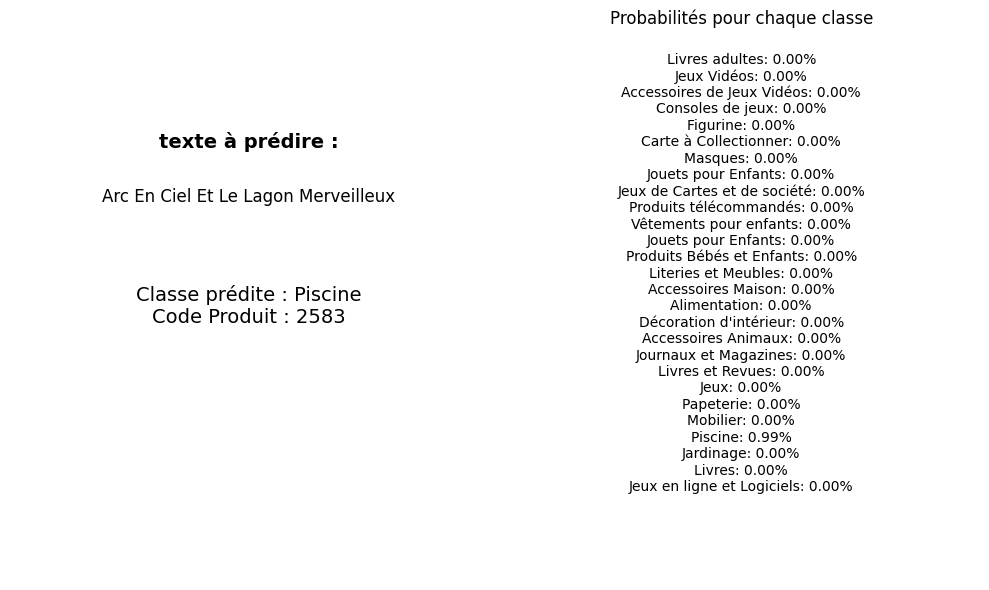

In [ ]:
# Prédiction avec le modèle xception
predictions = model_conv1D.predict(text)

# Classe prédite en utilisant argmax
predicted_class = np.argmax(predictions, axis=1)

# Calcul des probabilités pour chaque classe
class_probabilities = predictions[0]  

# Liste des labels
labels = ["Livres adultes", "Jeux Vidéos", "Accessoires de Jeux Vidéos", "Consoles de jeux", "Figurine", "Carte à Collectionner",
          "Masques", "Jouets pour Enfants", "Jeux de Cartes et de société", "Produits télécommandés",
          "Vêtements pour enfants", "Jouets pour Enfants", "Produits Bébés et Enfants",
          "Literies et Meubles", "Accessoires Maison", "Alimentation", "Décoration d'intérieur", "Accessoires Animaux",
          "Journaux et Magazines", "Livres et Revues", "Jeux", "Papeterie",
          "Mobilier", "Piscine", "Jardinage", "Livres", "Jeux en ligne et Logiciels"]

# Code produit associé aux classes
code_produit = [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281,
                1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060,
                2220, 2280, 2403, 2462, 2522, 2582, 2583,
                2585, 2705, 2905]

# Association des classes prédites pour les labels et les codes produits
predicted_label = labels[predicted_class[0]]
predicted_code = code_produit[predicted_class[0]]


# Affichage des résultats
#print("Classe prédite :", predicted_class)
#print("Label prédit :", predicted_labels)
#print("Probabilités de classe :", class_probabilities)

# Récupération du texte à prédire
text_to_predict = "texte à prédire :"

# Affichage des probabilités de chaque classe
#for label, prob in zip(labels, class_probabilities):
#    print(f"{label}: {prob:.2f}%")

# figure comprenant 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Affichage de la classe prédite avec le code produit dans la première colonne
axs[0].text(0.5, 0.8, text_to_predict, ha='center', va='center', fontsize=14, fontweight='bold')
axs[0].text(0.5, 0.7, "Arc En Ciel Et Le Lagon Merveilleux", ha='center', va='center', fontsize=12)
axs[0].text(0.5, 0.5, f"Classe prédite : {predicted_label}\nCode Produit : {predicted_code}", ha='center', va='center', fontsize=14)
axs[0].axis('off')
axs[0].set_title(print(prompt))

# Affichage des probabilités pour chaque classe dans la deuxième colonne
axs[1].text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
for i, (label, prob) in enumerate(zip(labels, class_probabilities)):
    axs[1].text(0.5, 0.95 - 0.03 * i, f"{label}: {prob:.2f}%", ha='center', va='center', fontsize=10)
axs[1].axis('off')
axs[1].set_title('Probabilités pour chaque classe')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

plt.show()